In [ ]:
from bs4 import BeautifulSoup
import urllib.request as urb
import requests
import arrow
from time import sleep
import pandas as pd
import re
from IPython.display import clear_output

def getLinks(url):
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    links = []
    linkes = []
 
    for link in soup.select("#pageContent .data li a"):
        links.append(link.get('href'))
    return links
def remove_scripts(soup):
    [s.extract() for s in soup("script")]
    
"""EconomiceTimes = pd.DataFrame({
    "Source":[],
    "Date":[],
    "Author":[],
    "Category":[],
    "Subtitle":[],
    "Title":[],
    "Content":[],
    "Tags":[],
    "Links":[]
})
EconomiceTimes = EconomiceTimes[["Source","Category","Date","Author","Title","Tags","Subtitle","Content","Links"]]
EconomiceTimes.to_csv("EconomiceTimes.csv")"""

for cycle in range(1,100):
        print("--------------------------------------------------------------------------------cylce: " + str(cycle))
        fd = open('EconomiceTimes.csv','a')
        od = pd.read_csv('EconomiceTimes.csv',encoding = "ISO-8859-1")
        linkpack = getLinks("https://economictimes.indiatimes.com/news/latest-news")
        for li in linkpack:
            if li not in od.Links.values[-300:]:
                try:
                    links = "https://economictimes.indiatimes.com" + li
                    source = []
                    author = []
                    title = []
                    date = []
                    subtitle = []
                    content = []
                    category = []
                    tags = []
                    linkl = []

                    html = requests.get(links)
                    soup = BeautifulSoup(html.content, 'html.parser')
                    data = soup.select(".section1 .Normal")
                    dat = [arrow.get(dat.get_text(),'MMM DD, YYYY, hh.mm a').format() for dat in soup.select(".publish_on")]
                    auth = [publ.get_text(strip = True)[:-1] for publ in soup.select(".publisher")]
                    titl = [soup.select("h1")[0].get_text(strip = True)]
                    subt = [subt.get_text(strip = True) for subt in soup.select("div .midImg figcaption")]
                    cont = [allt.get_text(strip = True) for allt in data]
                    cat =  [cat.get_text() for cat in soup.select(".breadCrumb span a")][1:]
                    tag = [tag.get_text(strip = True) for tag in (soup.select(".readanchore .rdMrBulDiv a"))]
                    linka = li

                    source.append("econominc-times")
                    author.append(auth)
                    title.append(titl)
                    subtitle.append(subt)
                    date.append(dat)
                    content.append(cont)
                    category.append(cat)
                    tags.append(tag)
                    linkl.append(linka)

                    NewsData1 = pd.DataFrame({
                    "Source":source,
                    "Date":date,
                    "Author":author,
                    "Category":category,
                    "Subtitle":subtitle,
                    "Title":title,
                    "Content":content,
                    "Tags":tags,
                    "Links":linkl
                    })
                    NewsData1 = NewsData1[["Source","Category","Date","Author","Title","Tags","Subtitle","Content","Links"]]
                    NewsData1.to_csv(fd, header = False)
                    print(dat)
                    print(NewsData1.Title[0])
                except:
                    print("error")
                    pass
            else:
                pass
        fd.close()
        sleep(3600)
        clear_output()

--------------------------------------------------------------------------------cylce: 1
['2019-01-02 19:13:00+00:00']
['Pro Volleyball signs Nippon Paint as associate sponsor for first two seasons']
['2019-01-02 19:12:00+00:00']
['Rahul Gandhi attacks government on Rafale deal, cites audio tape']
['2019-01-02 19:03:00+00:00']
['Ashok Leyland acquires 27.25% more stake in Ashley Aviation']
['2019-01-02 19:00:00+00:00']
['Sebi allows ACE Derivatives and Commodity Exchange to shut operations']
['2019-01-02 18:58:00+00:00']
['US wants access to American held in Moscow on spying charges']
error
['2019-01-02 18:50:00+00:00']
['Trai moves Supreme Court against TDSAT order on predatory pricing']
['2019-01-02 18:46:00+00:00']
['India to get info on account holders in Swiss banks from 2019: Govt']
['2019-01-02 18:45:00+00:00']
['Madras High Court stays ban on online sale of medicine']
['2019-01-02 18:43:00+00:00']
['Konkan coast, Gulf of Mannar saw widespread coral bleaching during 2014-17']
er

In [23]:
import pandas as pd
od = pd.read_csv('EconomiceTimes.csv',encoding ='ISO-8859-1')

In [24]:
def remove_sqrbrckt(sqrbrkt):
    try:
        return sqrbrkt.replace("[","").replace("]","")
    except:
        pass

In [25]:
od['Date'] = od['Date'].apply(remove_sqrbrckt)

In [26]:
od.Date = pd.to_datetime(od.Date,"coerce")

In [27]:
mask = (od['Date'] >= '2018-10-01') & (od['Date'] <= '2018-12-12')
od1 = od.loc[mask]

In [28]:
od1

,Unnamed: 0,Source,Category,Date,Author,Title,Tags,Subtitle,Content,Links
22934,NaN,econominc-times,"['News', 'International', 'World News']",2018-10-02 18:00:00,['AP'],['The Latest: Ernst says she intends to vote f...,['latest'],[],['WASHINGTON (AP) â TheLateston Supreme Cour...,/news/international/world-news/the-latest-erns...
22935,0.0,econominc-times,"['News', 'Science']",2018-10-02 17:00:00,['AFP'],['Russia finds ISS hole made deliberately: Spa...,"['space launch', 'Roscosmos State Corporation'...","['The official, who was placed under US sancti...",['Russian investigators looking into the origi...,/news/science/russia-finds-iss-hole-made-delib...
22936,0.0,econominc-times,"['News', 'International', 'World News']",2018-10-02 17:00:00,['AP'],['Mattis vows no cut in military support for F...,[],[],['PARIS (AP) â U.S. Defense Secretary Jim Ma...,/news/international/world-news/mattis-vows-no-...
22937,0.0,econominc-times,"['News', 'Economy', 'Policy']",2018-10-02 17:00:00,['PTI'],['GST collections likely to top Rs 1 lakh cror...,"['GST Collections', 'GST revenue', 'Goods and ...","['GST revenue rose to Rs 94,442 crore in Septe...",['NEW DELHI: Thefinance ministryexpects theGST...,/news/economy/policy/gst-collections-likely-to...
22938,0.0,econominc-times,"['News', 'Politics and Nation']",2018-10-02 17:00:00,['PTI'],"['Mah\u200batma Gandhi worked to unite India, ...","['Mah\u200batma Gandhi', 'Narendra Modi', 'Rah...",['Rahul Gandhi addressing a huge Sankalp Rally...,['Mahatma Gandhi aimed to unite the country bu...,/news/politics-and-nation/mahatma-gandhi-worke...
22939,0.0,econominc-times,"['Industry', 'Healthcare/Biotech', 'Pharmaceut...",2018-10-02 17:00:00,['PTI'],"[""Sun Pharma expects normalisation of India bu...","['R&D investments', 'Sun Pharma', 'india busin...",['The Mumbai-based drug firm posted consolidat...,['NEW DELHI:Sun Pharmaexpects itsIndia busines...,/industry/healthcare/biotech/pharmaceuticals/s...
22940,0.0,econominc-times,"['Opinion', 'ET View']",2018-10-02 17:00:00,['ET Bureau'],['ET View: Policy focus needed for sewage trea...,"['Sanitation', 'Central Pollution Control Boar...",[],"[""The massive increase insanitationcoverage al...",/opinion/et-view/et-view-policy-focus-needed-f...
22941,0.0,econominc-times,"['RISE', 'Startups', 'NewsBuzz']",2018-10-02 17:00:00,['PTI'],['Innovations for festive sales help build cap...,"['Amazon', 'Big Billion Days sale', 'Flipkart'...",['Flipkart will host its Big Billion Days (BBD...,['NEW DELHI:Flipkarthas significantly expanded...,/small-biz/startups/newsbuzz/innovations-for-f...
22942,0.0,econominc-times,"['News', 'Politics and Nation']",2018-10-02 17:00:00,['PTI'],['5 posts of senior government law officers ly...,"['Department of Legal Affairs', 'judiciary ann...","['The post of solicitor general, the second se...",['NEW DELHI: A number of positions of senior g...,/news/politics-and-nation/5-posts-of-senior-go...
22943,0.0,econominc-times,"['News', 'International', 'Business']",2018-10-02 17:00:00,['AFP'],['European Union warns Facebook not to lose co...,"['data breach', 'facebook', 'european union', ...",['The General Data Protection Regulation (GDPR...,['The EU\'s top data privacy enforcer expresse...,/news/international/business/european-union-wa...


In [29]:
category = ['Politics','Elections']
od2 = od1[od1.Category.str.contains('|'.join(category),case = False)]

In [30]:
od2.Category.unique()

array(["['News', 'Politics and Nation']",
       "['News', 'Elections', 'Telangana Assembly Elections']",
       "['News', 'Elections', 'Rajasthan Assembly Elections']",
       "['News', 'Elections', 'Madhya Pradesh Assembly Elections']",
       "['News', 'Elections', 'Chhattisgarh Assembly Elections']",
       "['News', 'Elections', 'Chhattisgarh']",
       "['News', 'Elections', 'Madhya Pradesh']",
       "['News', 'Elections', 'Telangana']",
       "['News', 'Elections', 'Rajasthan']",
       "['News', 'Elections', 'Mizoram']", 'News, Elections, Telangana',
       'News, Politics and Nation', 'News, Elections, Madhya Pradesh',
       'News, Elections, Mizoram', 'News, Elections, Rajasthan',
       'News, Elections, Chhattisgarh', 'News, Elections'], dtype=object)

In [22]:
od2.Title = od2.Title.apply(remove_sqrbrckt)

C:\Users\Desktop\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
od2.Title.dropna(inplace = True)
len(od2)

C:\Users\Desktop\Anaconda3\lib\site-packages\pandas\core\series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


2845

In [24]:
#getting all titles in single list
Titles = []
for i in od2.Title:
    Titles.append(i)

In [26]:
# joining the list
Titles = ''.join(Titles)

In [27]:
#tokenize
from nltk.tokenize import word_tokenize
tokens = word_tokenize(Titles)
tokens[:15]

["'Mah\\u200batma",
 'Gandhi',
 'worked',
 'to',
 'unite',
 'India',
 ',',
 'Modi',
 'dividing',
 'country',
 ':',
 'Rahul',
 'Gandhi',
 "''",
 '5']

In [28]:
#taking only alphabets
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['Gandhi', 'worked', 'to', 'unite', 'India', 'Modi', 'dividing', 'country', 'Rahul', 'Gandhi', 'posts', 'of', 'senior', 'government', 'law', 'officers', 'lying', 'vacant', 'Rs', 'crore', 'spent', 'on', 'salaries', 'and', 'perks', 'of', 'MPs', 'in', 'years', 'Protesting', 'farmers', 'not', 'with', 'government', 'assurance', 'Naresh', 'Tikait', 'Rahul', 'Gandhi', 'leads', 'foot', 'march', 'on', 'Mahatma', 'Gandhi', 'birth', 'anniversary', 'Gandhi', 'Peace', 'Prize', 'not', 'awarded', 'since', 'put', 'obscene', 'words', 'in', 'mouth', 'SC', 'said', 'in', 'picking', 'Nariman', 'over', 'Subramanium', 'Telangana', 'polls', 'KCR', 'to', 'address', 'meetings', 'from', 'tomorrow', 'school', 'founded', 'by', 'Mahatma', 'Gandhi', 'shuts', 'as', 'funds', 'dry', 'up', 'You', 'may', 'need', 'go', 'through', 'new', 'KYC', 'process', 'to', 'delink', 'Aadhaar', 'from', 'mobile', 'I', 'have', 'no', 'hope']


In [29]:
# converting to lowercase
lowerwords = [w.lower() for w in words]
print(lowerwords[:100])

['gandhi', 'worked', 'to', 'unite', 'india', 'modi', 'dividing', 'country', 'rahul', 'gandhi', 'posts', 'of', 'senior', 'government', 'law', 'officers', 'lying', 'vacant', 'rs', 'crore', 'spent', 'on', 'salaries', 'and', 'perks', 'of', 'mps', 'in', 'years', 'protesting', 'farmers', 'not', 'with', 'government', 'assurance', 'naresh', 'tikait', 'rahul', 'gandhi', 'leads', 'foot', 'march', 'on', 'mahatma', 'gandhi', 'birth', 'anniversary', 'gandhi', 'peace', 'prize', 'not', 'awarded', 'since', 'put', 'obscene', 'words', 'in', 'mouth', 'sc', 'said', 'in', 'picking', 'nariman', 'over', 'subramanium', 'telangana', 'polls', 'kcr', 'to', 'address', 'meetings', 'from', 'tomorrow', 'school', 'founded', 'by', 'mahatma', 'gandhi', 'shuts', 'as', 'funds', 'dry', 'up', 'you', 'may', 'need', 'go', 'through', 'new', 'kyc', 'process', 'to', 'delink', 'aadhaar', 'from', 'mobile', 'i', 'have', 'no', 'hope']


In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [31]:
# removing stopwords
words = [w for w in lowerwords if not w in stop_words]
print(words[:100])

['gandhi', 'worked', 'unite', 'india', 'modi', 'dividing', 'country', 'rahul', 'gandhi', 'posts', 'senior', 'government', 'law', 'officers', 'lying', 'vacant', 'rs', 'crore', 'spent', 'salaries', 'perks', 'mps', 'years', 'protesting', 'farmers', 'government', 'assurance', 'naresh', 'tikait', 'rahul', 'gandhi', 'leads', 'foot', 'march', 'mahatma', 'gandhi', 'birth', 'anniversary', 'gandhi', 'peace', 'prize', 'awarded', 'since', 'put', 'obscene', 'words', 'mouth', 'sc', 'said', 'picking', 'nariman', 'subramanium', 'telangana', 'polls', 'kcr', 'address', 'meetings', 'tomorrow', 'school', 'founded', 'mahatma', 'gandhi', 'shuts', 'funds', 'dry', 'may', 'need', 'go', 'new', 'kyc', 'process', 'delink', 'aadhaar', 'mobile', 'hope', 'govt', 'abandoned', 'says', 'another', 'victim', 'police', 'farmers', 'even', 'come', 'delhi', 'air', 'grievances', 'rahul', 'one', 'minor', 'killed', 'several', 'injured', 'blast', 'dum', 'dum', 'india', 'watches', 'deadly', 'virus']


In [90]:
from collections import Counter
counts = Counter(words)

labels = []
values = []
for i in counts.most_common()[:40]:
    labels.append(i[0])
    values.append(i[1])


[Text(0,0,'bjp'),
 Text(0,0,'modi'),
 Text(0,0,'congress'),
 Text(0,0,'polls'),
 Text(0,0,'india'),
 Text(0,0,'court'),
 Text(0,0,'gandhi'),
 Text(0,0,'government'),
 Text(0,0,'rahul'),
 Text(0,0,'says'),
 Text(0,0,'pm'),
 Text(0,0,'narendra'),
 Text(0,0,'cbi'),
 Text(0,0,'delhi'),
 Text(0,0,'singh'),
 Text(0,0,'case'),
 Text(0,0,'ram'),
 Text(0,0,'cm'),
 Text(0,0,'rajasthan'),
 Text(0,0,'chief'),
 Text(0,0,'minister'),
 Text(0,0,'sc'),
 Text(0,0,'pradesh'),
 Text(0,0,'temple'),
 Text(0,0,'sabarimala'),
 Text(0,0,'telangana'),
 Text(0,0,'rs'),
 Text(0,0,'supreme'),
 Text(0,0,'govt'),
 Text(0,0,'k'),
 Text(0,0,'assembly'),
 Text(0,0,'mp'),
 Text(0,0,'plea'),
 Text(0,0,'may'),
 Text(0,0,'poll'),
 Text(0,0,'election'),
 Text(0,0,'seeks'),
 Text(0,0,'hc'),
 Text(0,0,'probe'),
 Text(0,0,'centre')]

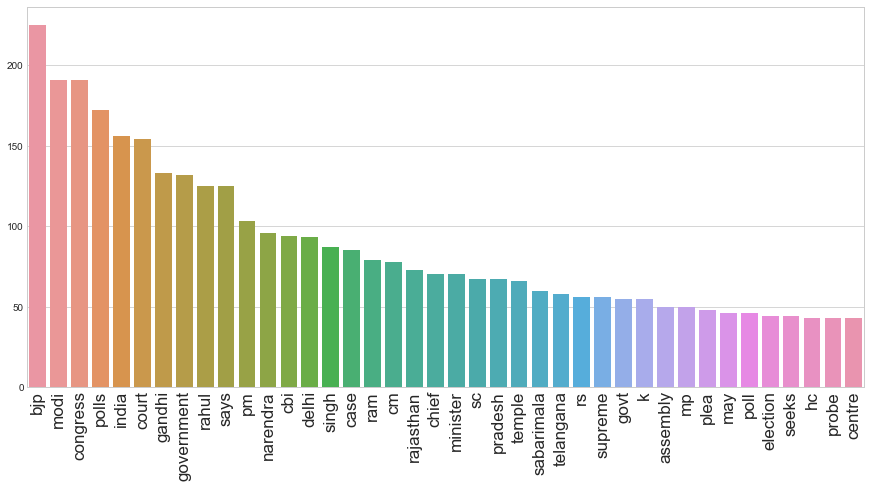

In [91]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
ax = sns.barplot(y=values, x=labels)
ax.set_xticklabels(labels, rotation='vertical', fontsize=17)